<a href="https://colab.research.google.com/github/vaguiarfinance/Resolu-o_Cases_DNC/blob/main/Case_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ideia do Projeto Slot 4 - Wallmart

Case: Você foi contratado pelo Wallmart para fazer um levantamento do faturamento das lojas nos USA e apontar qual loja seria melhor para expandir seu tamanho. É preciso analisar as vendas semanais de cada loja, calcular algumas informações importantes que serão perguntadas e ao final de tudo, indicar em qual loja deva ser investida.

# Sobre o Wallmart
[Walmart, Inc.](https://pt.wikipedia.org/wiki/Walmart), é uma multinacional estadunidense de lojas de departamento. A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. No ano de 2021, obteve um um lucro de $13.51 Bilhões.

# O Dataset

Sendo uma das principais lojas de varejo do mundo, os dados contemplam as vendas semanais de 45 lojas espalhadas pelos Estados Unidos. O Walmart realiza vários eventos promocionais de descontos ao longo do ano. Essas remarcações precedem feriados importantes, os quatro maiores de todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. As semanas que incluem esses feriados têm um peso maior.

Sobre o [Dataset do Wallmart](https://www.kaggle.com/yasserh/walmart-dataset)

Os dados apresentam as vendas semanais de 05/02/10 até 01/11/12 em 45 lojas varejistas da rede Wallmart e também algumas métricas econômicas e meteriológicas por semana. A descrição destas características estão abaixo:

Variável | Descrição
--- | ---
Store | Número da Loja
Date | Semana de venda
Weekly_Sales | Venda naquela semana
Holiday_Flag | Flag se é ou não semana com feriado (1 – Holiday week 0 – Non-holiday week)
Temperature | Temperatuda do dia em ºF
Fuel_Price | Preço do combustível na região da loja
CPI | Índice de preços ao consumidor
Unemployment | Taxa de desemprego

Variável | Descrição
--- | ---
Holiday Events | Semanas
Super Bowl |  12-Feb-10, 11-Feb-11, 10-Feb-12
Labour Day | 10-Sep-10, 9-Sep-11, 7-Sep-12
Thanksgiving |  26-Nov-10, 25-Nov-11, 23-Nov-12
Christmas |  31-Dec-10, 30-Dec-11, 28-Dec-12

# Perguntas importantes a serem respondidas

1. Qual o preço médio de venda semanal por loja?
2. Qual o atributo que tem maior correlação (positiva ou negatica) com o número de vendas? (E que faça sentido)
3. Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?
4. Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.
5. Pensando na expansão de uma das lojas, que loja você escolheria e o por que?  

# Importação de bibliotecas


In [ ]:
#-- Importanção de bibliotecas
import numpy as np
from datetime import date,datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
df.corr()

<ipython-input-32-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [ ]:
abs(df.corr()['Weekly_Sales']).sort_values(ascending=False)

<ipython-input-4-c3d7daeaaa21>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(df.corr()['Weekly_Sales']).sort_values(ascending=False)


Weekly_Sales    1.000000
Store           0.335332
Unemployment    0.106176
CPI             0.072634
Temperature     0.063810
Holiday_Flag    0.036891
Fuel_Price      0.009464
Name: Weekly_Sales, dtype: float64

<ipython-input-5-7b05aed90e02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues')


<Axes: >

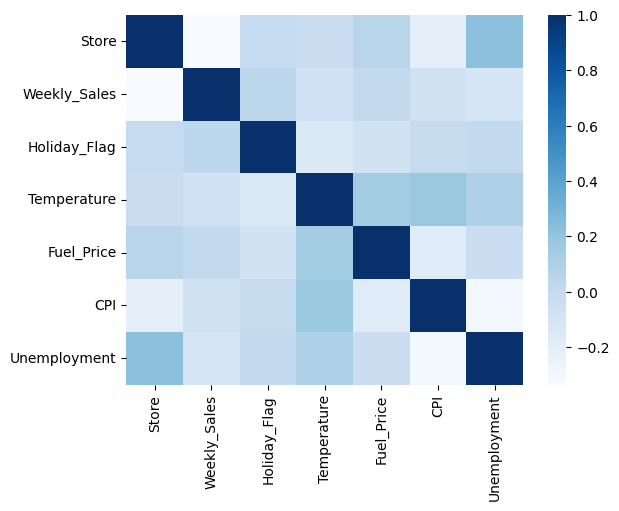

In [ ]:
sns.heatmap(df.corr(), cmap='Blues')

In [ ]:
df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
df_list = []
corr_list = []
for i in df.Store.unique():
  df_copy = df.copy()
  df_copy = df_copy[df_copy.Store == i].reset_index(drop=True)
  df_copy['Teste_shif'] = df_copy['Weekly_Sales'].shift(1)
  #df_copy['Temp_corr'] = df_copy.corr()['Weekly_Sales']['Temperature']
  corr_list.append( df_copy.corr()['Weekly_Sales'] )
  df_list.append( df_copy )




<ipython-input-41-26ecd7165c5c>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_list.append( df_copy.corr()['Weekly_Sales'] )
<ipython-input-41-26ecd7165c5c>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_list.append( df_copy.corr()['Weekly_Sales'] )
<ipython-input-41-26ecd7165c5c>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_list.append( df_copy.corr()['Weekly_Sales'] )
<ipython-input-41-26ecd7165c5c>:8: FutureWarning: The default value of numeric_only i

In [ ]:
df_copy.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Teste_shif
0,45,2010-02-05,890689.51,0,27.31,2.784,181.871190,8.992,NaN
1,45,2010-02-12,656988.64,1,27.73,2.773,181.982317,8.992,890689.51
2,45,2010-02-19,841264.04,0,31.27,2.745,182.034782,8.992,656988.64
3,45,2010-02-26,741891.65,0,34.89,2.754,182.077469,8.992,841264.04
4,45,2010-03-05,777951.22,0,37.13,2.777,182.120157,8.992,741891.65


In [ ]:
df_list[34].corr()['Weekly_Sales']

<ipython-input-44-145f75a6b52f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_list[34].corr()['Weekly_Sales']


Store                NaN
Weekly_Sales    1.000000
Holiday_Flag    0.201414
Temperature     0.043392
Fuel_Price     -0.498197
CPI            -0.424107
Unemployment    0.483865
Teste_shif      0.512782
Name: Weekly_Sales, dtype: float64

In [ ]:
corr_list[0]['Temperature']

-0.2227005585538112

In [ ]:
teste = df.groupby(['Date', 'Temperature', 'Fuel_Price', 'CPI','Unemployment']).agg({'Store': 'nunique'}).sort_values( ['Store','Date'] ,ascending=False)
teste[teste.Store == 3]

Store
Date       Temperature Fuel_Price CPI        Unemployment       
2012-10-26 65.95       4.301      131.193097 10.199            3
           70.50       3.506      223.078337 6.170             3
2012-10-19 68.52       3.594      223.059808 6.170             3
           68.66       4.449      131.149968 10.199            3
2012-10-12 61.53       3.601      223.015426 6.170             3
...                                                          ...
2010-02-19 54.83       2.915      126.526286 13.975            3
2010-02-12 37.77       2.548      210.897994 8.324             3
           47.87       2.946      126.496258 13.975            3
2010-02-05 39.05       2.572      210.752605 8.324             3
           49.47       2.962      126.442065 13.975            3

[286 rows x 1 columns]

No charts were generated by quickchart


In [ ]:
df[(df.Weekly_Sales > 1641957.44) & (df.Store == 1)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
44,1,2010-12-10,1682614.26,0,46.33,2.843,211.465953,7.838
45,1,2010-12-17,1891034.93,0,49.84,2.869,211.405312,7.838
46,1,2010-12-24,2387950.20,0,52.33,2.886,211.405122,7.838
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742
54,1,2011-02-18,1686842.78,0,57.36,3.045,213.247885,7.742
91,1,2011-11-04,1697229.58,0,54.98,3.332,217.837382,7.866
94,1,2011-11-25,2033320.66,1,60.14,3.236,218.467621,7.866
96,1,2011-12-09,1799682.38,0,43.93,3.158,218.961846,7.866


In [ ]:
df_1 = df[df.Store == 1]
df_1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573


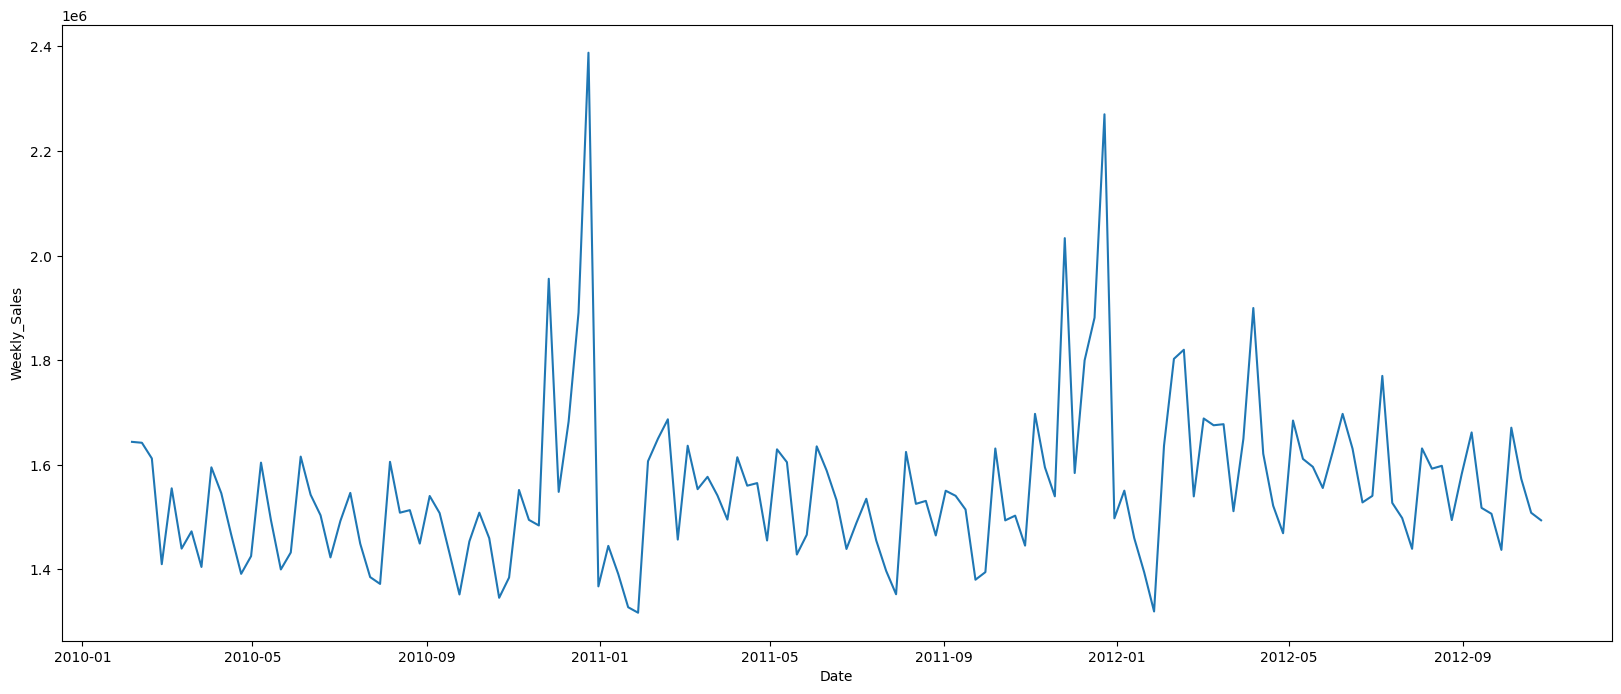

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_1,x='Date',y='Weekly_Sales');

In [ ]:
df_1['Moving_avg'] = df['Weekly_Sales'].rolling(window=3).mean()
df_1.head()

<ipython-input-56-99a4827b18b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Moving_avg'] = df['Weekly_Sales'].rolling(window=3).mean()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Moving_avg
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,NaN
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,NaN
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.632539e+06
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1.554551e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1.525501e+06


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

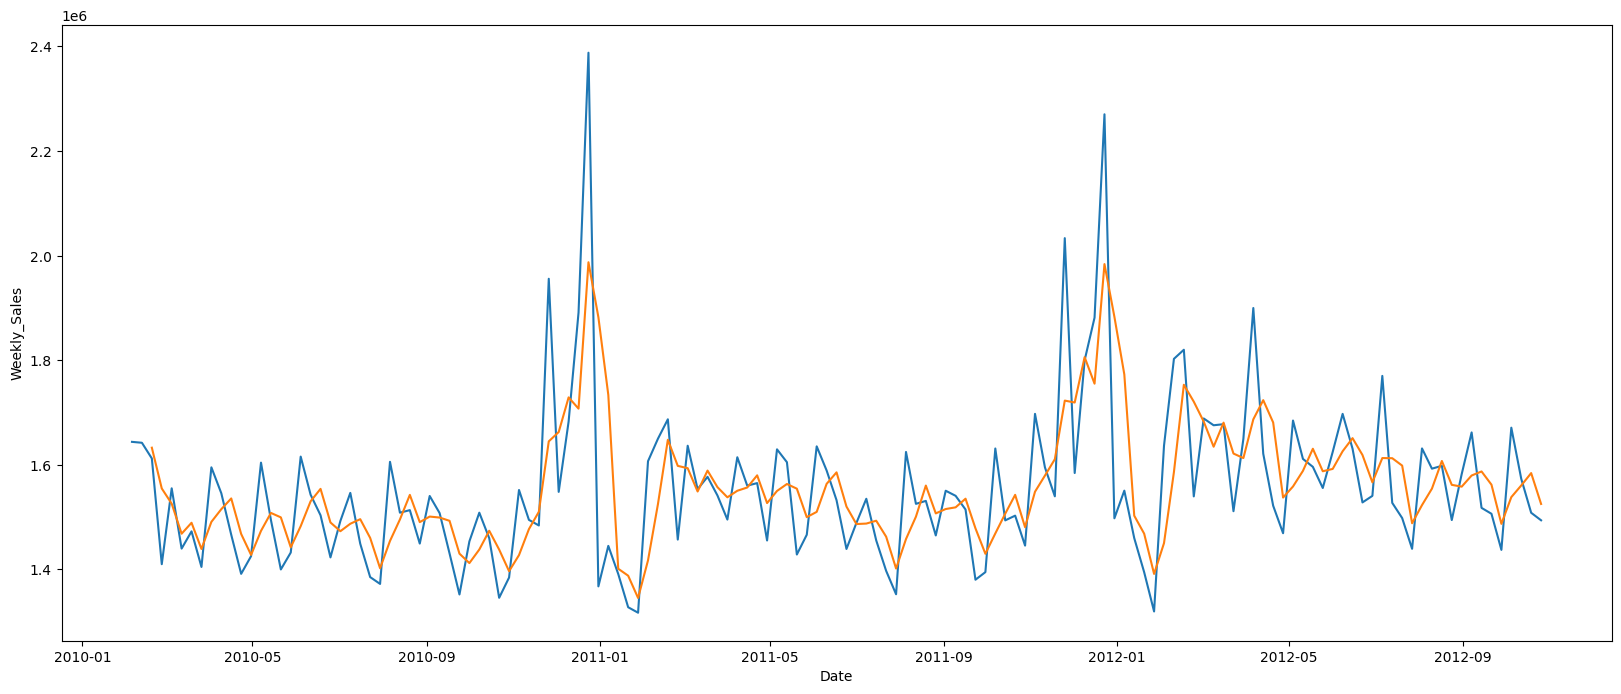

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_1,x='Date',y='Weekly_Sales')
sns.lineplot(data=df_1,x='Date',y='Moving_avg')

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

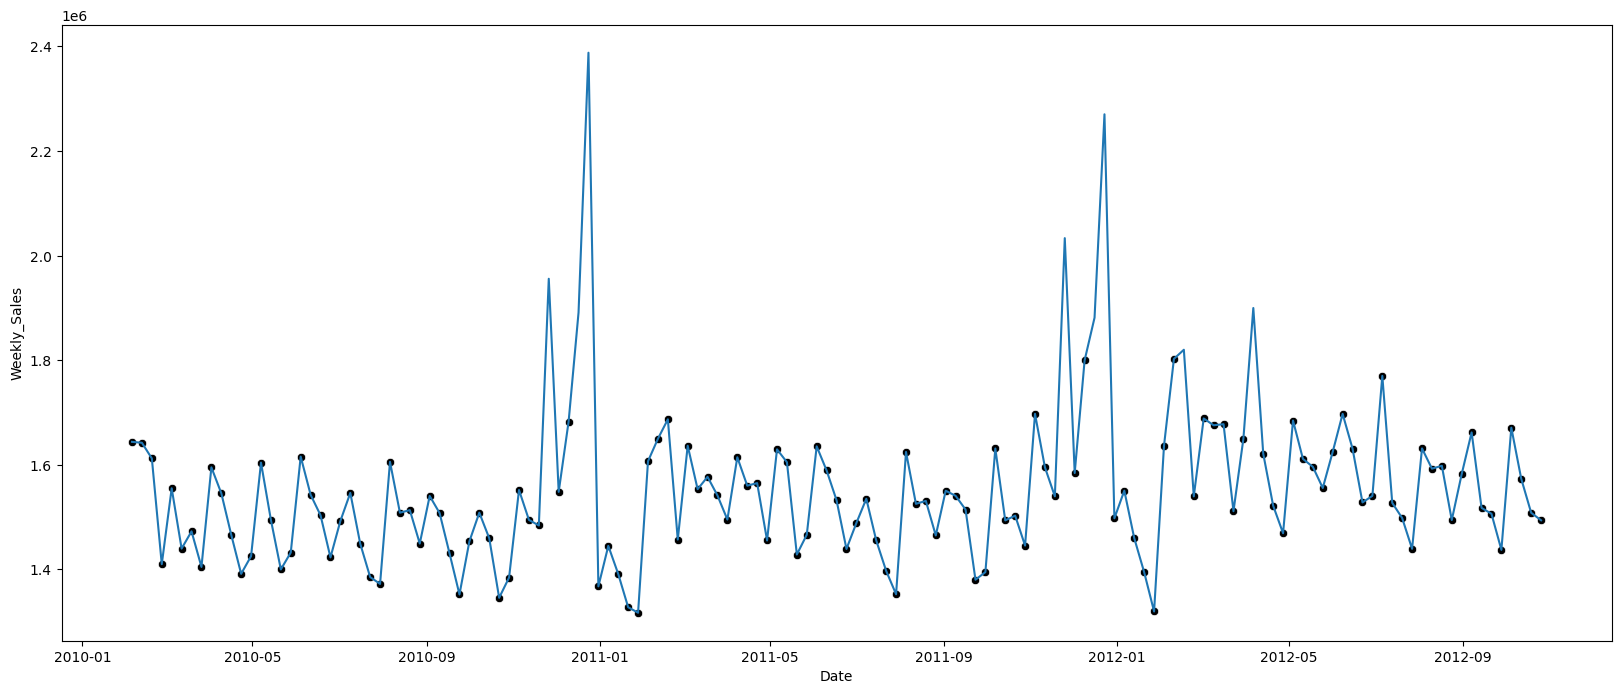

In [ ]:
lim_cut = df_1.describe(percentiles=[0.8,0.9,0.95,0.99])['Weekly_Sales']['95%']
df1_clean = df_1[df_1.Weekly_Sales <= lim_cut]

plt.figure(figsize=(20,8))
sns.lineplot(data=df_1,x='Date',y='Weekly_Sales')
sns.scatterplot(data=df1_clean,x='Date',y='Weekly_Sales',color='k')

In [ ]:
df1_clean['Weekly_Sales'].max()

1802477.43

In [ ]:
df1_clean['Sales_N'] = df1_clean['Weekly_Sales']/df1_clean['Weekly_Sales'].max()
df1_clean.head()

<ipython-input-63-26e3127ed765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean['Sales_N'] = df1_clean['Weekly_Sales']/df1_clean['Weekly_Sales'].max()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Moving_avg,Sales_N
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,NaN,0.911907
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,NaN,0.910945
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.632539e+06,0.894307
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1.554551e+06,0.782106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1.525501e+06,0.862594


<Axes: xlabel='Date', ylabel='Sales_N'>

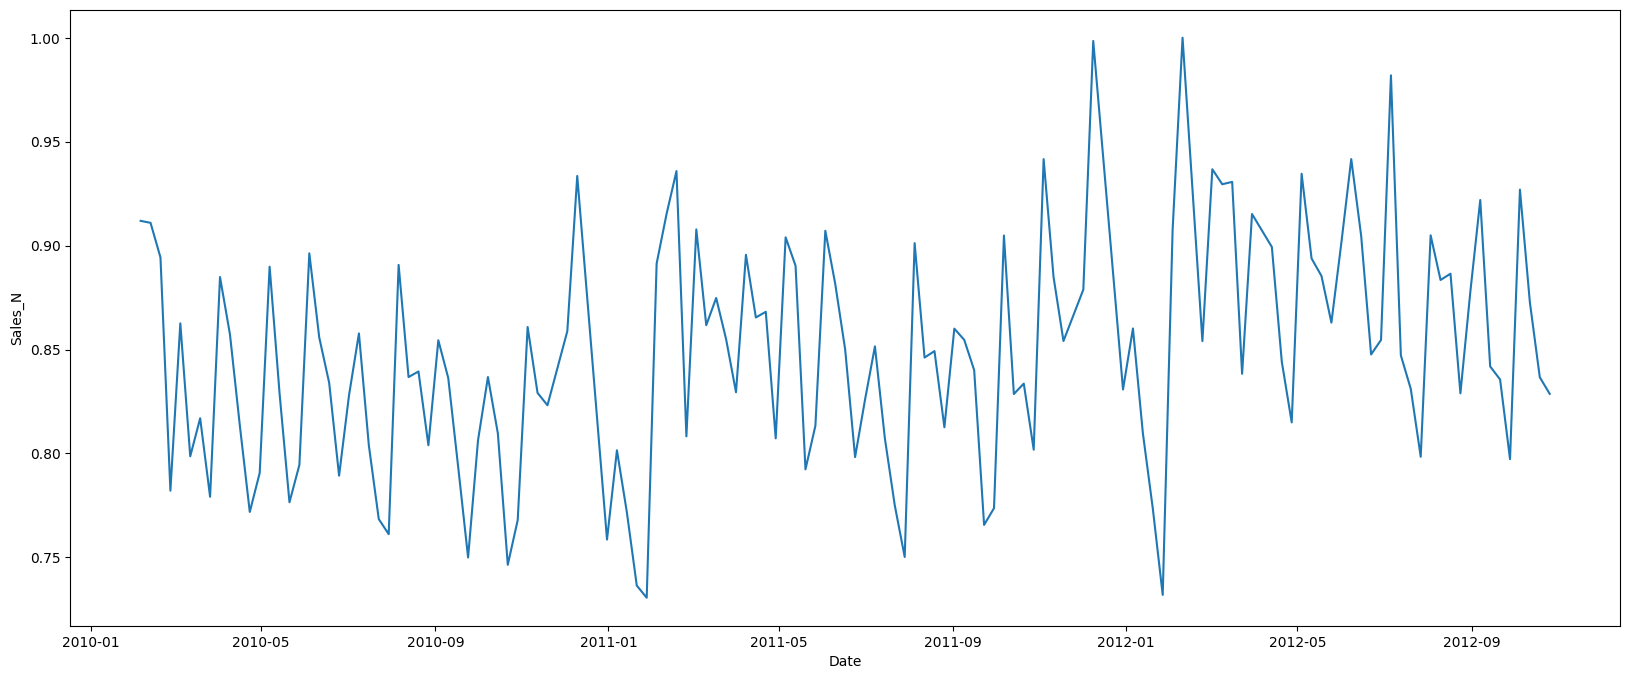

In [ ]:

plt.figure(figsize=(20,8))
sns.lineplot(data=df1_clean,x='Date',y='Sales_N')

In [ ]:
df_1['Acum_sales'] = df_1['Weekly_Sales'].cumsum()
df_1['Acum_sales_perc'] = (df_1['Acum_sales']/df_1['Weekly_Sales'].sum())*100
df_1.head()

<ipython-input-72-bf3d09179b48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Acum_sales'] = df_1['Weekly_Sales'].cumsum()
<ipython-input-72-bf3d09179b48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Acum_sales_perc'] = (df_1['Acum_sales']/df_1['Weekly_Sales'].sum())*100


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Moving_avg,Sales_N,Acum_sales,Acum_sales_perc
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,NaN,0.911907,1643690.90,0.739060
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,NaN,0.910945,3285648.34,1.477341
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.632539e+06,0.894307,4897616.51,2.202138
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1.554551e+06,0.782106,6307344.10,2.836000
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1.525501e+06,0.862594,7862150.78,3.535095


<Axes: xlabel='Date', ylabel='Sales_N'>

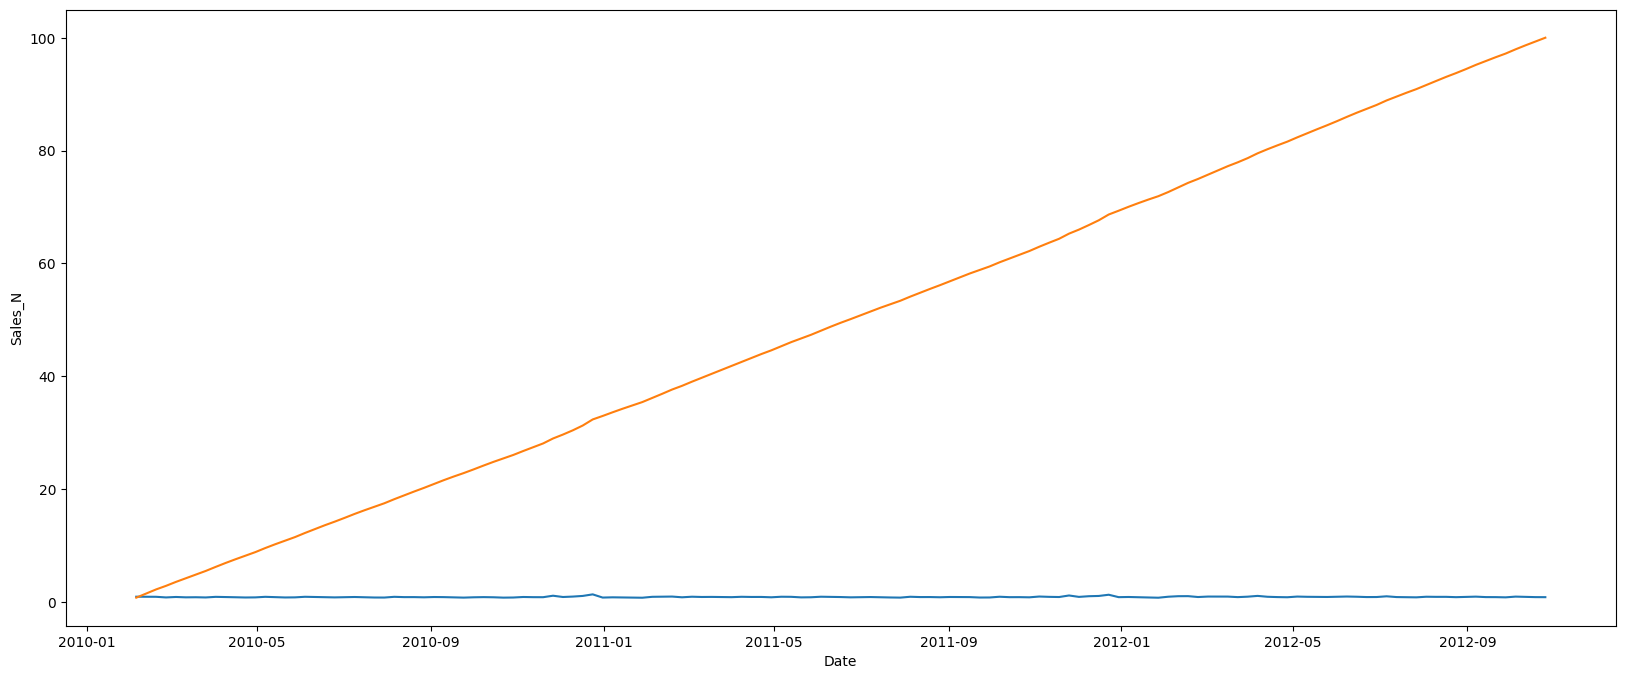

In [ ]:


plt.figure(figsize=(20,8))
sns.lineplot(data=df_1,x='Date',y='Sales_N')
sns.lineplot(data=df_1,x='Date',y='Acum_sales_perc')

In [ ]:
df1['Weekly_Sales'].describe()

count    1.430000e+02
mean     5.394514e+05
std      9.912014e+04
min      3.959872e+05
25%      4.944612e+05
50%      5.186284e+05
75%      5.520409e+05
max      1.130927e+06
Name: Weekly_Sales, dtype: float64

In [ ]:
df1_clean['Weekly_Sales'].describe()

count       135.000000
mean     519716.287778
std       43930.500143
min      395987.240000
25%      493294.900000
50%      515119.640000
75%      546715.490000
max      633826.550000
Name: Weekly_Sales, dtype: float64

In [ ]:

df_1['Dif_relative'] = (df_1['Weekly_Sales'].shift(1) - df_1['Weekly_Sales'])/df_1['Weekly_Sales'].shift(1)*-100
df_1.head()

<ipython-input-75-8f6fc5cfec2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Dif_relative'] = (df_1['Weekly_Sales'].shift(1) - df_1['Weekly_Sales'])/df_1['Weekly_Sales'].shift(1)*-100


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Moving_avg,Sales_N,Acum_sales,Acum_sales_perc,Dif_relative
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,NaN,0.911907,1643690.90,0.739060,NaN
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,NaN,0.910945,3285648.34,1.477341,-0.105461
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.632539e+06,0.894307,4897616.51,2.202138,-1.826434
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1.554551e+06,0.782106,6307344.10,2.836000,-12.546189
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1.525501e+06,0.862594,7862150.78,3.535095,10.291285


In [ ]:
df_1['Year_Month'] = df['Date'].dt.strftime('%Y-%m')
df_1.groupby(['Year_Month','Store']).agg({'Weekly_Sales':['mean','max','min','sum'],
                                         'Dif_relative':['mean','max','min','sum','std']})

<ipython-input-76-6316a7bd693f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Year_Month'] = df['Date'].dt.strftime('%Y-%m')


Weekly_Sales                                      \
                          mean         max         min         sum   
Year_Month Store                                                     
2010-02    1      1.576836e+06  1643690.90  1409727.59  6307344.10   
2010-03    1      1.467823e+06  1554806.68  1404429.92  5871293.98   
2010-04    1      1.484560e+06  1594968.28  1391256.12  7422801.92   
2010-05    1      1.482485e+06  1603955.12  1399662.07  5929938.64   
2010-06    1      1.521020e+06  1615524.71  1422711.60  6084081.46   
2010-07    1      1.448897e+06  1546074.18  1371986.60  7244483.04   
2010-08    1      1.518988e+06  1605491.78  1449142.92  6075952.95   
2010-09    1      1.457448e+06  1540163.53  1351791.03  5829793.92   
2010-10    1      1.430128e+06  1508239.93  1345454.00  7150641.75   
2010-11    1      1.621387e+06  1955624.11  1483784.18  6485547.06   
2010-12    1      1.775391e+06  2387950.20  1367320.01  8876953.18   
2011-01    1      1.370013e+06  1444732.28  1316899.31  5480050.97   
2011-02    1      1.599972e+06  1686842.78  1456800.28  6399887.57   
2011-03    1      1.576844e+06  1636263.41  1541102.38  6307375.48   
2011-04    1      1.537825e+06  1614259.35  1455090.69  7689123.60   
2011-05    1      1.532108e+06  1629391.28  1428218.27  6128431.80   
2011-06    1      1.548743e+06  1635078.41  1438830.15  6194971.74   
2011-07    1      1.445531e+06  1534849.64  1352219.79  7227654.31   
2011-08    1      1.536246e+06  1624383.75  1464693.46  6144985.73   
2011-09    1      1.475908e+06  1550229.22  1380020.27  7379542.34   
2011-10    1      1.518082e+06  1630989.95  1445249.09  6072327.75   
2011-11    1      1.716243e+06  2033320.66  1539483.70  6864972.83   
2011-12    1      1.806519e+06  2270188.99  1497462.72  9032594.71   
2012-01    1      1.430923e+06  1550369.92  1319325.59  5723690.52   
2012-02    1      1.699519e+06  1819870.00  1539387.83  6798074.91   
2012-03    1      1.640399e+06  1688420.76  1511068.07  8201997.40   
2012-04    1      1.627804e+06  1899676.88  1468928.37  6511214.82   
2012-05    1      1.611741e+06  1684519.99  1555444.55  6446962.46   
2012-06    1      1.604117e+06  1697230.96  1527845.81  8020582.84   
2012-07    1      1.558487e+06  1769854.16  1439123.71  6233946.67   
2012-08    1      1.579524e+06  1631135.79  1494122.38  7897619.59   
2012-09    1      1.530595e+06  1661767.33  1437059.26  6122381.52   
2012-10    1      1.561397e+06  1670785.97  1493659.74  6245587.29   

                 Dif_relative                                              
                         mean        max        min        sum        std  
Year_Month Store                                                           
2010-02    1        -4.826028  -0.105461 -12.546189 -14.478085   6.741002  
2010-03    1         0.136161  10.291285  -7.413468   0.544643   7.904052  
2010-04    1         0.531106  13.566954  -5.135195   2.655531   7.915557  
2010-05    1         0.423979  12.550300  -6.839569   1.695916   9.110498  
2010-06    1         0.097018  12.810461  -5.359763   0.388072   8.557228  
2010-07    1        -0.628095   4.899555  -6.282704  -3.140476   4.867137  
2010-08    1         1.764335  17.019494  -6.057584   7.057340  10.517688  
2010-09    1        -1.612473   6.280996  -5.494184  -6.449892   5.473932  
2010-10    1         0.624840   7.511403  -7.808304   3.124202   6.092884  
2010-11    1         9.874051  31.799768  -3.685074  39.496204  16.141778  
2010-12    1        -3.245005  26.277424 -42.740849 -16.225025  27.964398  
2011-01    1        -0.855227   5.661606  -4.572818  -3.420909   4.636464  
2011-02    1         3.323936  22.000943 -13.637459  13.295742  14.583997  
2011-03    1         1.624545  12.318993  -5.076920   6.498180   7.624969  
2011-04    1        -1.015813   7.972538  -7.012253  -5.079063   5.655571  
2011-05    1         0.528649  11.978675 -11.001994   2.114595   9.534364  
2011-06    1        -0.239233  11.529765  -6.088624  

# Análise introdutória

In [ ]:
#-- Load do CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/DNC/Walmart.csv',sep=',')
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.tail()

FileNotFoundError: ignored

In [ ]:
df_sorted  = df.sort_values(['Store', 'Date']).reset_index(drop=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#-- Verificar integridade do DF
df.info()

In [ ]:
# Plotando uma relação de Tempo X Venda (Com máximo, mínimo e média entre departamentos e lojas)

plt.figure(figsize=(18,6))
df['Date'] = pd.to_datetime(df['Date'])
sns.lineplot(data=df, x="Date", y="Weekly_Sales")
plt.title('Vendas por dia')
plt.show()



In [ ]:
#-- Análise estatística simplificada
df.describe(percentiles=[0.95,0.99,0.995])

In [ ]:
#-- As vendas semanais estão normalmente entre 0.5 e 1.5 milhõs de dolares
sns.histplot(data=df, x='Weekly_Sales')

# Perguntas importantes

## 1. Qual o preço médio de venda semanal por loja?

In [ ]:
#-- Agrupar por loja
df_group = df.groupby('Store',as_index=False).mean()
df_group.sort_values('Weekly_Sales',ascending=False)
df_group.head()

<ipython-input-79-1059cafa7875>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = df.groupby('Store',as_index=False).mean()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1.555264e+06,0.06993,68.306783,3.219699,215.996892,7.610420
1,2,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846
2,3,4.027044e+05,0.06993,71.434196,3.219699,219.391531,7.176986
3,4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692
4,5,3.180118e+05,0.06993,69.410140,3.219699,216.565581,6.295406


In [ ]:
#-- Selecionar os 5 com maior Média
top5 = df_group.sort_values('Weekly_Sales',ascending=False).Store.to_list()[:5]
top5

[20, 4, 14, 13, 2]

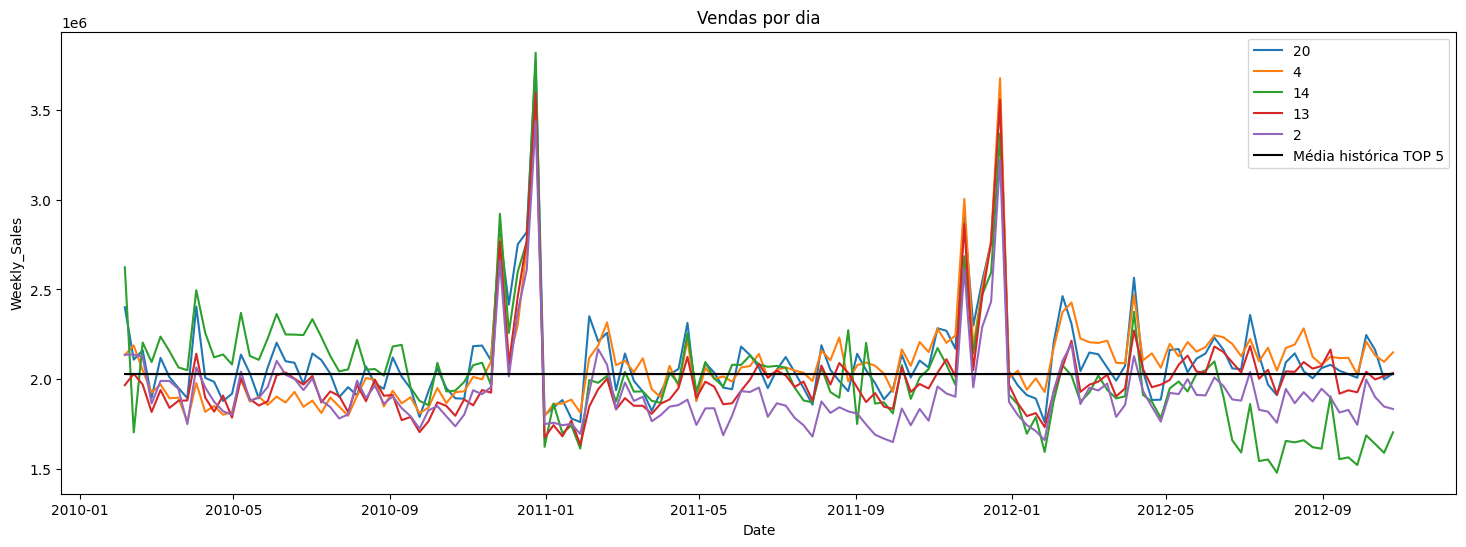

In [ ]:
# Plotando uma relação de Tempo X Venda dos Top 5 acima
plt.figure(figsize=(18,6))
for i in top5:
  sns.lineplot(data=df[df.Store == i], x="Date", y="Weekly_Sales",label=i)


sns.lineplot(data=df, x="Date", y=df[df.Store.isin([20, 4, 14, 13, 2])].Weekly_Sales.mean(),label='Média histórica TOP 5',c='black')


plt.title('Vendas por dia')
plt.show()

## 2. Qual o atributo que tem maior correlação (positiva ou negatica) com o número de vendas?

<ipython-input-82-2ef879c495e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['Weekly_Sales'].sort_values())
<ipython-input-82-2ef879c495e3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


Store          -0.335332
Unemployment   -0.106176
CPI            -0.072634
Temperature    -0.063810
Fuel_Price      0.009464
Holiday_Flag    0.036891
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64


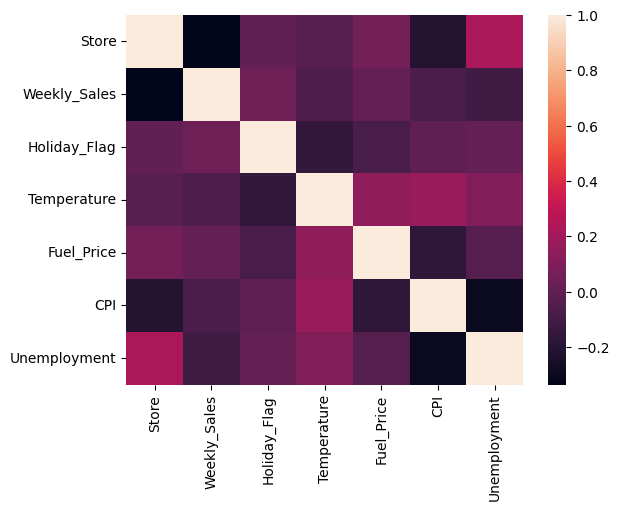

In [ ]:
print(df.corr()['Weekly_Sales'].sort_values())
# Resp: Unemployment com um corr de -0.106. O Store não é parâmetro pois
# ele representa o ID da loja e não necessariamente o tamanho ou poder de venda
sns.heatmap(df.corr())
plt.show()

## 3. Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?

In [ ]:
#-- Acumulado
df_acul = df.groupby('Store',as_index=False).sum().sort_values('Weekly_Sales',ascending=False).iloc[0,:]
top_store = df_acul['Store']
top_store

<ipython-input-84-e7f766212d62>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_acul = df.groupby('Store',as_index=False).sum().sort_values('Weekly_Sales',ascending=False).iloc[0,:]


20.0

In [ ]:
# Selecionanto apenas os dados da loja com maior venda (Store 20)
df_top_store = df[df.Store == top_store]
top_mean = df_top_store['Weekly_Sales'].mean()
df_top_store_overmean = df_top_store[df_top_store.Weekly_Sales >= top_mean]
df_top_store_overmean.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2717,20,2010-02-05,2401395.47,0,25.92,2.784,204.247194,8.187
2718,20,2010-02-12,2109107.90,1,22.12,2.773,204.385747,8.187
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187
2721,20,2010-03-05,2119213.72,0,31.75,2.777,204.494073,8.187
2725,20,2010-04-02,2405395.22,0,51.00,2.850,204.025284,7.856


In [ ]:
print('Semanas totais:',df_top_store.shape[0])
print('Semanas acima da média:',df_top_store_overmean.shape[0])
print(r'{}% das semanas acima da média'.format(round(df_top_store_overmean.shape[0]*100/df_top_store.shape[0],2)))

Semanas totais: 143
Semanas acima da média: 52
36.36% das semanas acima da média


## 4. Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.

In [ ]:
# Dicionário de feriados
holiday_dict = { #Format: %d/%m/%y
'Super Bowl':	['12/02/10', '11/02/11', '10/02/12'],
'Labour Day':	['10/09/10', '09/09/11', '07/09/12'],
'Thanksgiving':	['26/09/10', '25/09/11', '23/09/12'],
'Christmas':	['31/12/10', '30/12/11', '28/12/12']
}

In [ ]:
# Demonstrativo de como acessar os dados no dict
for i in holiday_dict.keys():
  print(i)
  for k in holiday_dict[i]:
    print(k)

Super Bowl
12/02/10
11/02/11
10/02/12
Labour Day
10/09/10
09/09/11
07/09/12
Thanksgiving
26/09/10
25/09/11
23/09/12
Christmas
31/12/10
30/12/11
28/12/12


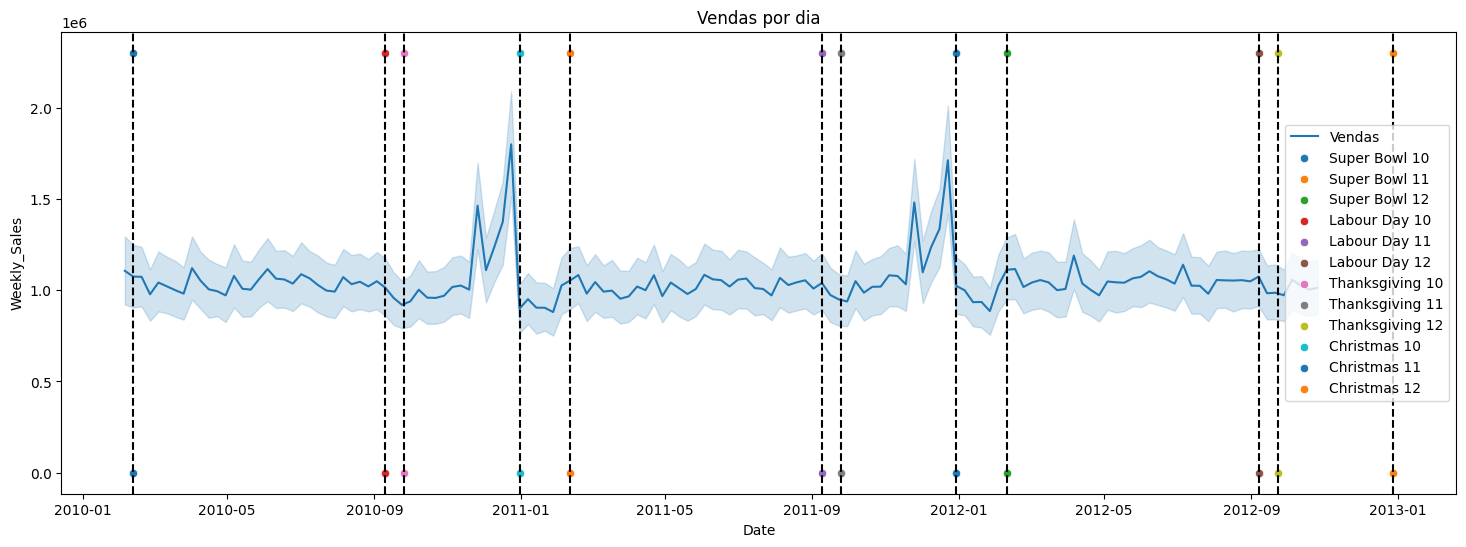

In [ ]:
# Plotando uma relação de Tempo X Venda (Com máximo, mínimo e média)

plt.figure(figsize=(18,6))
sns.lineplot(data=df, x="Date", y="Weekly_Sales", label='Vendas', markers=True, dashes=False)

for i in holiday_dict.keys():
  #print(i)
  for k in holiday_dict[i]:
    #print(k)
    sns.scatterplot(x=[datetime.strptime(k,'%d/%m/%y'),datetime.strptime(k,'%d/%m/%y')],y=[0,2.3*10**6],label=str(i)+ ' ' + k[-2:])
    plt.axvline(datetime.strptime(k,'%d/%m/%y'),0,2.3*10**6,color='black',linestyle='--')


plt.title('Vendas por dia')
plt.show()

## 5. Pensando na expansão de uma das lojas, que loja você escolheria e o por que?  

Como fator de escolha para a pergunta acima, vou escolher a loja que teve um maior rendimento histórico. Ou seja, vou escolher aquela que teve mais semanas com vendas acima da média histórica.

In [ ]:
df_mean = df.groupby('Store',as_index=False).mean()
df_mean = df_mean[['Store','Weekly_Sales']]
df_mean

<ipython-input-91-5eb3c1ffb8e5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby('Store',as_index=False).mean()


,Store,Weekly_Sales
0,1,1.555264e+06
1,2,1.925751e+06
2,3,4.027044e+05
3,4,2.094713e+06
4,5,3.180118e+05
5,6,1.564728e+06
6,7,5.706173e+05
7,8,9.087495e+05
8,9,5.439806e+05
9,10,1.899425e+06


In [ ]:
lista_aux = []
lista_aux1 = []
for i in df_mean.Store:
  lista_aux.append(df[df.Store == i].shape[0])
  lista_aux1.append(df[(df.Store == i) & (df.Weekly_Sales >= df_mean.iloc[i-1,1])].shape[0])

In [ ]:
df_mean['Total'] = lista_aux
df_mean['Bateu'] = lista_aux1
df_mean['Perc'] = df_mean['Bateu']/df_mean['Total']*100
df_mean.head()

,Store,Weekly_Sales,Total,Bateu,Perc
0,1,1.555264e+06,143,56,39.160839
1,2,1.925751e+06,143,53,37.062937
2,3,4.027044e+05,143,64,44.755245
3,4,2.094713e+06,143,62,43.356643
4,5,3.180118e+05,143,56,39.160839


In [ ]:
# Loja escolhida foi a loja 43
df_mean.sort_values('Perc',ascending=False).head()

,Store,Weekly_Sales,Total,Bateu,Perc
42,43,633324.723147,143,73,51.048951
41,42,556403.863147,143,71,49.650350
35,36,373511.992797,143,71,49.650350
36,37,518900.281958,143,69,48.251748
37,38,385731.653287,143,68,47.552448
